In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for calculating the auc from fpr, tpr
from matplotlib.backends.backend_pdf import PdfPages

plt.style.use("science.mplstyle")


In [2]:
base_dir = "/global/home/users/rrmastandrea/MJetCLR/"  # change this to your working directory

# Load in the data

In [4]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]

exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]


exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


"""
lct_const_rep_tpr_dict = {}
lct_const_rep_fpr_dict = {}
nn_const_rep_tpr_dict = {}
nn_const_rep_fpr_dict = {}
"""
lct_tpr_dict = {0:{},1:{},2:{}}
lct_fpr_dict = {0:{},1:{},2:{}}
nn_tpr_dict = {0:{},1:{},2:{}}
nn_fpr_dict = {0:{},1:{},2:{}}
trans_BC_tpr_dict = {}
trans_BC_fpr_dict = {}

lct_auc_dict = {0:[],1:[],2:[]}
nn_auc_dict = {0:[],1:[],2:[]}
lct_maxsic_dict = {0:[],1:[],2:[]}
nn_maxsic_dict = {0:[],1:[],2:[]}
trans_BC_auc = []
trans_BC_maxsic = []

fixed_TPR = 0.5

lct_FPRatTPR_dict = {0:[],1:[],2:[]}
nn_FPRatTPR_dict = {0:[],1:[],2:[]}
trans_BC_FPRatTPR = []



for exp_id in exp_id_list:
    
    full_id = exp_id+"S_16kB_48d"
    full_idt = exp_id+"S_16kB_512d"
    
    expt_dir = base_dir + "projects/rep_learning/experiments/SB_ratios_22_18_01/" + full_id + "/"
    expt_dirt = base_dir + "projects/rep_learning/experiments/SB_ratios_22_18_01/" + full_idt + "/"
    constit_num = 50
    
    # Constituent reps
    """
    lct_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_tpr_"+str(constit_num)+".npy" )
    lct_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_lct_fpr_"+str(constit_num)+".npy" )
    nn_const_rep_tpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_tpr_"+str(constit_num)+".npy" )
    nn_const_rep_fpr_dict[exp_id] = np.load( expt_dir+"const_rep_nn_fpr_"+str(constit_num)+".npy" )
    """
    
    # Transformer BC 
    
    trans_BC_tpr_dict[exp_id] = np.load( expt_dirt+"trans_BC_tpr_"+str(constit_num)+".npy" )
    trans_BC_fpr_dict[exp_id] = np.load( expt_dirt+"trans_BC_fpr_"+str(constit_num)+".npy" )
    
    trans_BC_auc.append(metrics.auc(trans_BC_fpr_dict[exp_id], trans_BC_tpr_dict[exp_id]))

    SIC = trans_BC_tpr_dict[exp_id]/np.sqrt(trans_BC_fpr_dict[exp_id])
    finite_SIC = SIC[np.isfinite(SIC)]
    trans_BC_maxsic.append(np.max(finite_SIC))

    dist_from_fixed_tpr = np.abs(trans_BC_tpr_dict[exp_id] - fixed_TPR)
    min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
    trans_BC_FPRatTPR.append(trans_BC_fpr_dict[exp_id][min_dist_ind])
    
    
    for i in range(3):
    
        # CLR trained LCT
        lct_tpr_dict[i][exp_id] = np.load( expt_dir+"CLR_LCT"+str(i)+"_tpr_"+str(constit_num)+".npy" )
        lct_fpr_dict[i][exp_id] = np.load( expt_dir+"CLR_LCT"+str(i)+"_fpr_"+str(constit_num)+".npy" )
        lct_auc_dict[i].append(metrics.auc(lct_fpr_dict[i][exp_id], lct_tpr_dict[i][exp_id]))

        SIC = lct_tpr_dict[i][exp_id]/np.sqrt(lct_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        lct_maxsic_dict[i].append(np.max(finite_SIC))

        dist_from_fixed_tpr = np.abs(lct_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        lct_FPRatTPR_dict[i].append(lct_fpr_dict[i][exp_id][min_dist_ind])

    
        # CLR trained NN
        nn_tpr_dict[i][exp_id] = np.load( expt_dir+"CLR_NN"+str(i)+"_tpr_"+str(constit_num)+".npy" )
        nn_fpr_dict[i][exp_id] = np.load( expt_dir+"CLR_NN"+str(i)+"_fpr_"+str(constit_num)+".npy" )
        nn_auc_dict[i].append(metrics.auc(nn_fpr_dict[i][exp_id], nn_tpr_dict[i][exp_id]))

        SIC = nn_tpr_dict[i][exp_id]/np.sqrt(nn_fpr_dict[i][exp_id])
        finite_SIC = SIC[np.isfinite(SIC)]
        nn_maxsic_dict[i].append(np.max(finite_SIC))
        
        dist_from_fixed_tpr = np.abs(nn_tpr_dict[i][exp_id] - fixed_TPR)
        min_dist_ind = np.where(dist_from_fixed_tpr == np.min(dist_from_fixed_tpr))[0][0]
        nn_FPRatTPR_dict[i].append(nn_fpr_dict[i][exp_id][min_dist_ind])
    
    
    
    

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


# Individual Plots

## TPR / FPR

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide

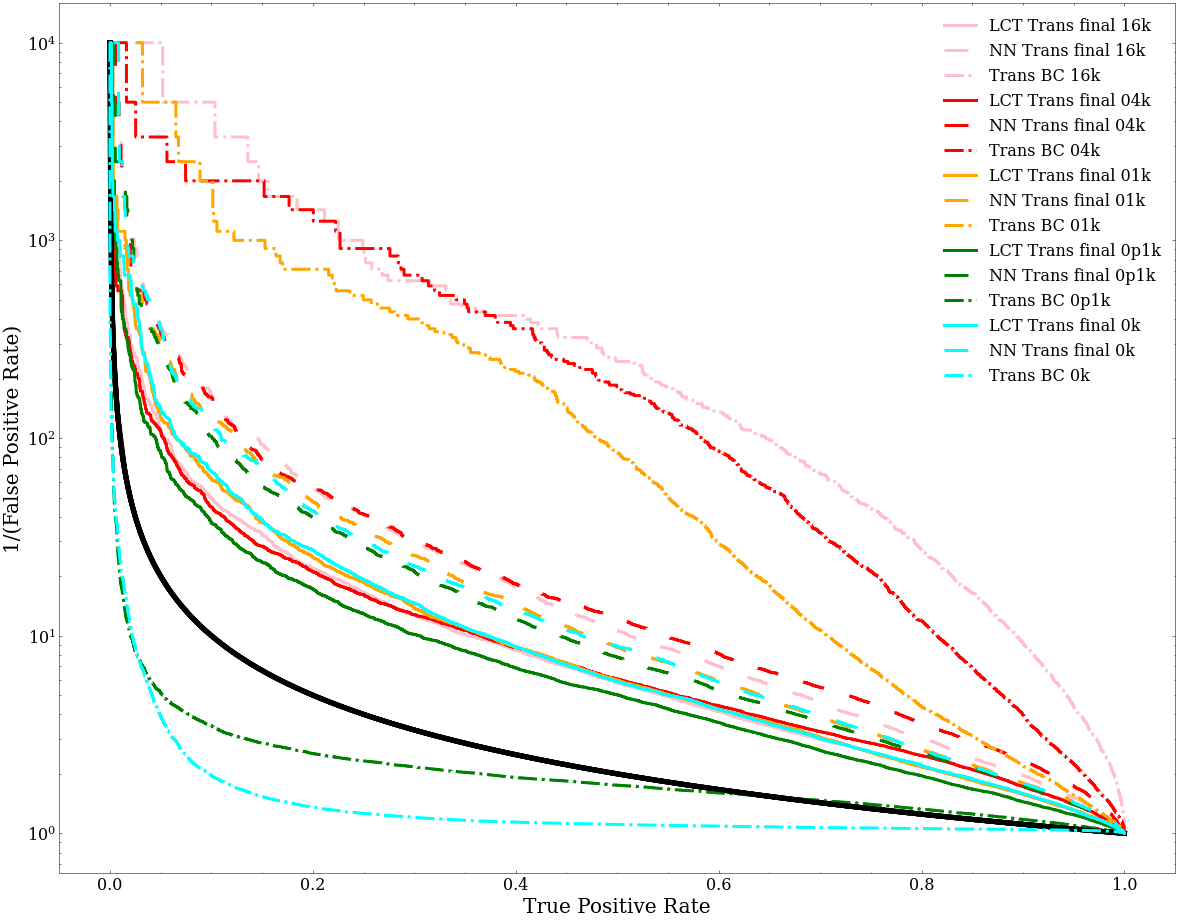

In [5]:
fig = plt.figure(figsize = (20,16))

exp_id_list = ["16k", "04k", "01k", "0p1k", "0k"]

colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

for i, exp_id in enumerate(exp_id_list): 

    # ALL DIMS
    #"""
    # random
    plt.plot(lct_tpr_dict[2][exp_id],1.0/lct_tpr_dict[2][exp_id], color = "black", linewidth = 5)

    #plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[i], linestyle = "dotted",  linewidth = l)
    #plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[i], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[i], linestyle = "dashdot",  linewidth = l)
    #"""
    
    # ONE DIM
    """
    plt.plot(lct_const_rep_tpr_dict[exp_id], 1.0/lct_const_rep_fpr_dict[exp_id], label = "LCT Const. rep "+exp_id, color = colors[0], linestyle = "dotted",  linewidth = l)
    plt.plot(nn_const_rep_tpr_dict[exp_id], 1.0/nn_const_rep_fpr_dict[exp_id], label = "NN Const. rep "+exp_id, color = colors[1], linestyle = "dashed" , linewidth = l)
    plt.plot(lct_tpr_dict[2][exp_id], 1.0/lct_fpr_dict[2][exp_id], label = "LCT Trans final "+exp_id, color = colors[2], linestyle = "solid",  linewidth = l)
    plt.plot(nn_tpr_dict[2][exp_id], 1.0/nn_fpr_dict[2][exp_id], label = "NN Trans final "+exp_id, color = colors[3], linestyle = (0,(8,10)),  linewidth = l)
    plt.plot(trans_BC_tpr_dict[exp_id], 1.0/trans_BC_fpr_dict[exp_id], label = "Trans BC "+exp_id, color = colors[4], linestyle = "dashdot",  linewidth = l)
    """
 
    
plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()




## SIC

/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/global/home/users/rrmastandrea/computingML2/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divid

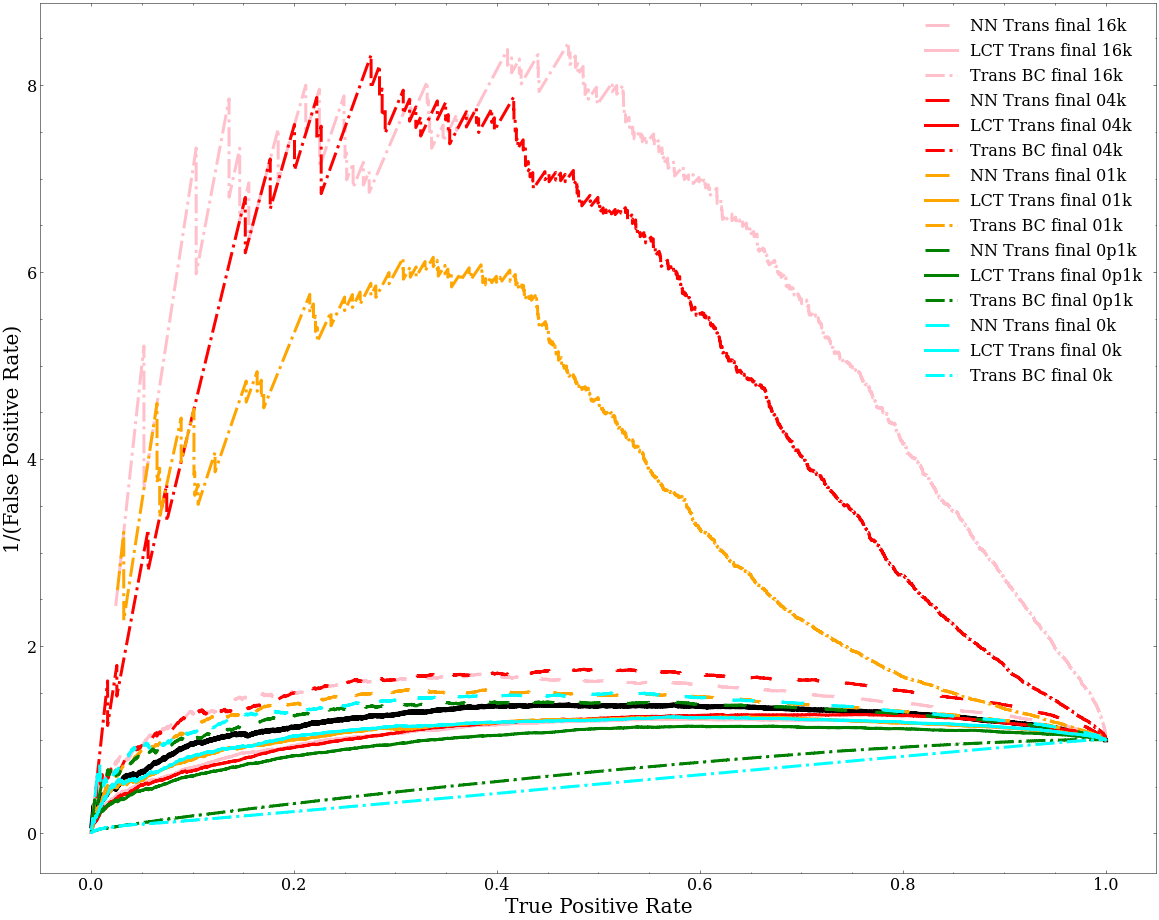

In [6]:
fig = plt.figure(figsize = (20,16))

exp_id_list = ["16k", "04k", "01k", "0p1k", "0k"]
colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]

l = 3

with np.errstate(divide='ignore'):
    plt.plot(nn_tpr_dict[0][exp_id], nn_tpr_dict[0][exp_id]/np.sqrt(nn_fpr_dict[0][exp_id]), color = "black", linewidth = 5)

    for i, exp_id in enumerate(exp_id_list): 

        # ALL DIMS
        #"""
        # random
        
        #plt.plot(nn_tpr_dict[1][exp_id], nn_tpr_dict[1][exp_id]/np.sqrt(nn_fpr_dict[1][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
        plt.plot(nn_tpr_dict[2][exp_id], nn_tpr_dict[2][exp_id]/np.sqrt(nn_fpr_dict[2][exp_id]), label = "NN Trans final "+exp_id, color = colors[i], linestyle = (0,(8,10)),  linewidth = l)
        plt.plot(lct_tpr_dict[2][exp_id], lct_tpr_dict[2][exp_id]/np.sqrt(lct_fpr_dict[2][exp_id]), label = "LCT Trans final "+exp_id, color = colors[i], linestyle = "solid",  linewidth = l)
        plt.plot(trans_BC_tpr_dict[exp_id], trans_BC_tpr_dict[exp_id]/np.sqrt(trans_BC_fpr_dict[exp_id]), label = "Trans BC final "+exp_id, color = colors[i], linestyle = "dashdot",  linewidth = l)

        #"""

 
    
#plt.yscale("log")
plt.xlabel("True Positive Rate")
plt.ylabel("1/(False Positive Rate)")
plt.legend()
plt.show()


#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
##pp.savefig(fig)
#pp.close()



# Summary plots

## Final AUC

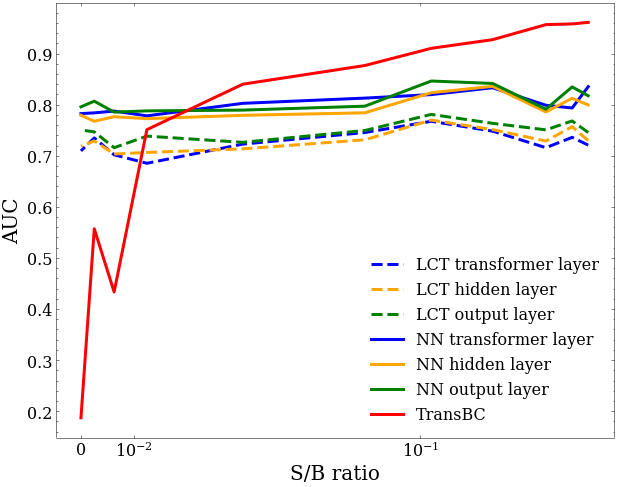

In [7]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]
exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]

exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_auc_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_auc_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_auc_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_auc_dict[2], label = "NN output layer", color = "green", linewidth = l)

plt.plot(exp_id_SB_ratios, trans_BC_auc, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("AUC")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## max SIC

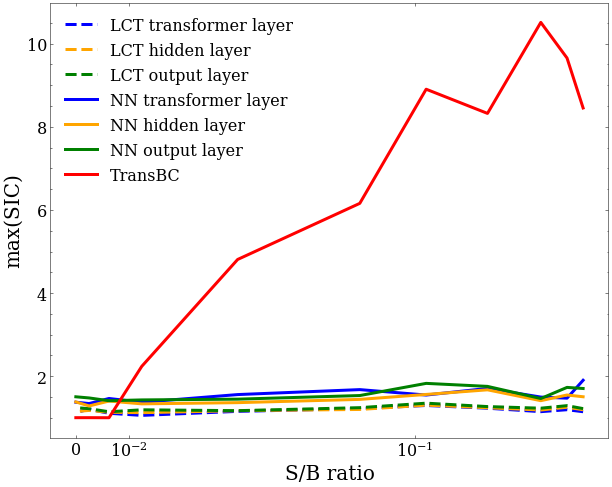

In [8]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]
exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]

exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_maxsic_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_maxsic_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_maxsic_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_maxsic_dict[2], label = "NN output layer", color = "green", linewidth = l)

plt.plot(exp_id_SB_ratios, trans_BC_maxsic, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("max(SIC)")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()



## FPR at SPR

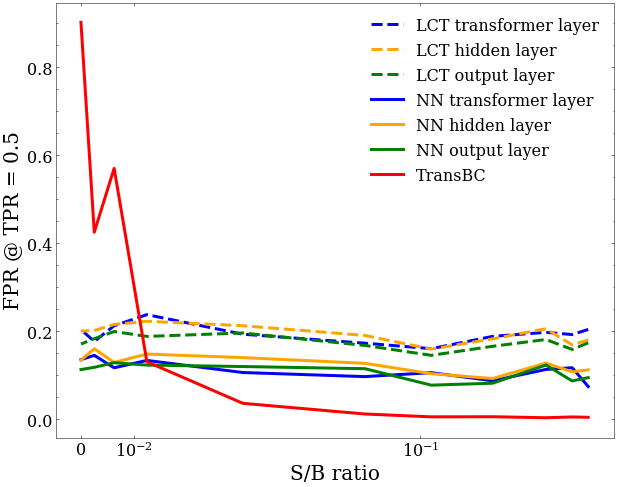

In [9]:
# Load in the data
exp_id_list = ["16k", "12k", "08k", "04k", "02k", "01k", "0p5k", "0p2k", "0p1k", "0p04k", "0k"]
exp_id_S_nums = [16000, 12000, 8000, 4000, 2000, 1000, 500, 200, 100, 40, 0]

exp_id_SB_ratios = [float(x)/float(x+16000) for x in exp_id_S_nums]


colors = ["pink", "red", "orange", "green", "cyan", "blue", "purple", "brown", "grey", "black","C11"]
#colors = ["blue", "red", "blue", "red", "blue", "red", "blue", "red", "blue","red"]


from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize = (10,8))

l = 3

plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[0], label = "LCT transformer layer", linewidth = l, color = "blue", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[1], label = "LCT hidden layer", linewidth = l, color = "orange", linestyle = "dashed")
plt.plot(exp_id_SB_ratios, lct_FPRatTPR_dict[2], label = "LCT output layer", linewidth = l, color = "green", linestyle = "dashed")

plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[0], label = "NN transformer layer", color = "blue", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[1], label = "NN hidden layer", color = "orange", linewidth = l)
plt.plot(exp_id_SB_ratios, nn_FPRatTPR_dict[2], label = "NN output layer", color = "green", linewidth = l)

plt.plot(exp_id_SB_ratios, trans_BC_FPRatTPR, label = "TransBC", color = "red", linewidth = l)

    
plt.xscale("symlog", linthresh=.05)
plt.xlabel("S/B ratio")
plt.ylabel("FPR @ TPR = 0.5")
plt.legend()
plt.show()



#img_name = "fpr.pdf"
#pp = PdfPages(img_name)
#pp.savefig(fig)
#pp.close()

